In [36]:
import scipy
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
import numpy as np
from librosa.core import resample

In [56]:
sample_rate, samples = wavfile.read('audio_mixed.wav')

In [57]:
#downsampling to 10000Hz
sr = 9000
resampled = resample(samples.astype(np.float32),sample_rate,sr) 

#make sure every signal is within the range of (0,1)
samples_casted = resampled / (2.**15) 

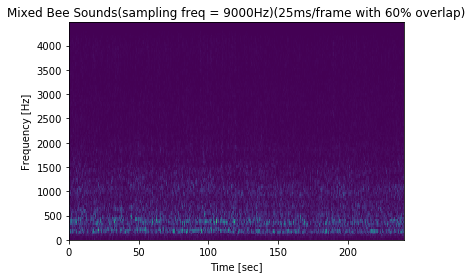

In [58]:
seg_len = sr/40 #25ms
overlap = seg_len*0.6  #60% overlap
f, t, Zxx = signal.stft(samples_casted, fs = sr, nperseg = seg_len, noverlap = overlap)

Zxx_abs = np.abs(Zxx)
plt.pcolormesh(t, f, Zxx_abs, vmin = Zxx_abs.min(), vmax = Zxx_abs.max())
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Mixed Bee Sounds(sampling freq = 9000Hz)(25ms/frame with 60% overlap)')
plt.show()

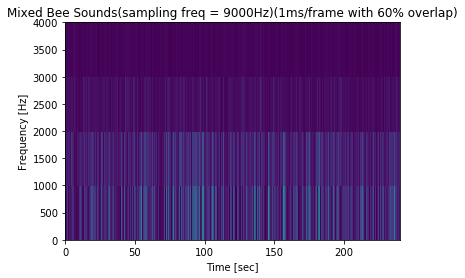

In [59]:
seg_len = sr/1000 #1ms
overlap = seg_len*0.6  #60% overlap
f, t, Zxx = signal.stft(samples_casted, fs = sr, nperseg = seg_len, noverlap = overlap)

Zxx_abs = np.abs(Zxx)
plt.pcolormesh(t, f, Zxx_abs, vmin = Zxx_abs.min(), vmax = Zxx_abs.max())
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Mixed Bee Sounds(sampling freq = 9000Hz)(1ms/frame with 60% overlap)')
plt.show()